# Kaplan-Meier Analyisis

## Introduction

The Kaplan-Meier estimator is given by the following formula:

$$
\hat{S}(t) = \prod_{t_{i} \leq t} (1 - \hat{q}_{i})  =  \prod_{t_{i} \leq t} \bigg(1 - \frac{d_{i}}{n_{i}} \bigg)
$$

$\hat{S}(t) $ denoting the survival function at a time t, $n_{i}$ i is the number of subjects at risk at time $t_{i}$ and lastly $d_{i}$ is the number of
individuals who 'fail' at time $t_{i}$. More technical detail found in the book 'Applied Survival Analysis Using R', essentially in chapter three.


\vspace{10}
\noindent
We note that for confidence bounds (as displayed on the subsequent plots), the variance is obtainedn by the formula below (more details in chapter three):

$$
var \bigg( log\bigg[-log\hat{S}(t) \bigg] \bigg) \approx \frac{1}{\bigg[log\hat{S}(t)\bigg]^2} \sum_{t_{i} \leq t}  \frac{d_{i}}{n_{i}(n_{i} - d_{i})} 
$$


## 'Veteran' dataset

**veteran:** dataset of 137 observations x 8 variables form a two-treatment randomized trial for lung cancer.


**trt:** 	1=standard 2=test \\


**celltype:**	1=squamous, 2=smallcell, 3=adeno, 4=large \\

**time:**	survival time \\

**status:**	censoring status \\

**karno:**	Karnofsky performance score (100=good) \\

**diagtime:**	months from diagnosis to randomisation \\

**age:**	in years \\

**prior:**	prior therapy 0=no, 10=yes

In [27]:
from sksurv.datasets import load_veterans_lung_cancer
import pandas as pd

data_x, data_y = load_veterans_lung_cancer()
data_x

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test
133,64.0,large,60.0,5.0,no,test
134,67.0,large,70.0,18.0,yes,test
135,65.0,large,80.0,4.0,no,test


In [26]:
pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

,Status,Survival_in_days
1,True,8.0
2,True,10.0
3,True,20.0
4,False,25.0
5,True,59.0


Text(0.5, 0, 'time $t$')

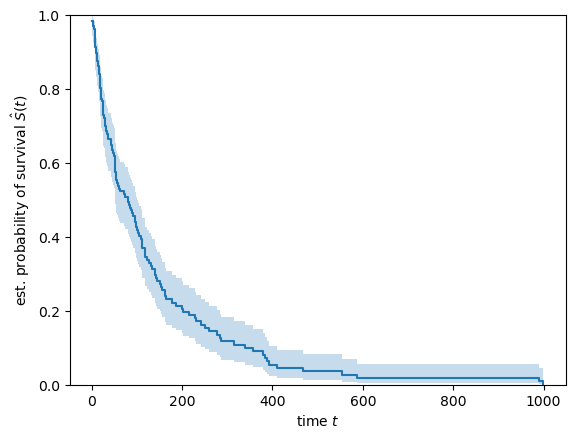

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y["Status"], data_y["Survival_in_days"], conf_type="log-log"
)
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

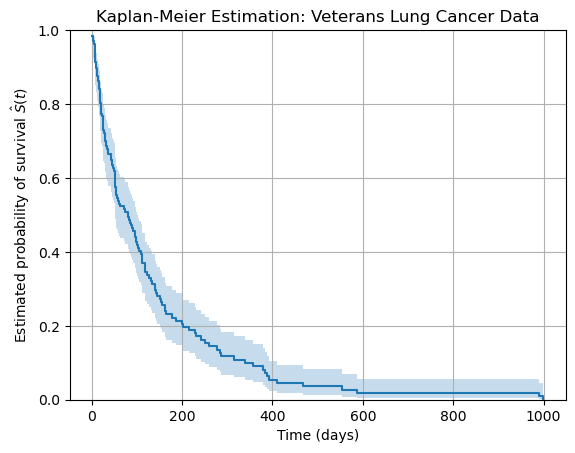

    Time  Survival Probability
0      0                0.9854
1     30                0.7004
2     60                0.5309
3     90                0.4640
4    120                0.3377
5    150                0.2718
6    180                0.2224
7    210                0.1882
8    240                0.1621
9    270                0.1351
10   300                0.1081
11   330                0.0990
12   360                0.0810
13   390                0.0540
14   420                0.0360
15   450                0.0360
16   480                0.0270
17   510                0.0270
18   540                0.0270
19   570                0.0180


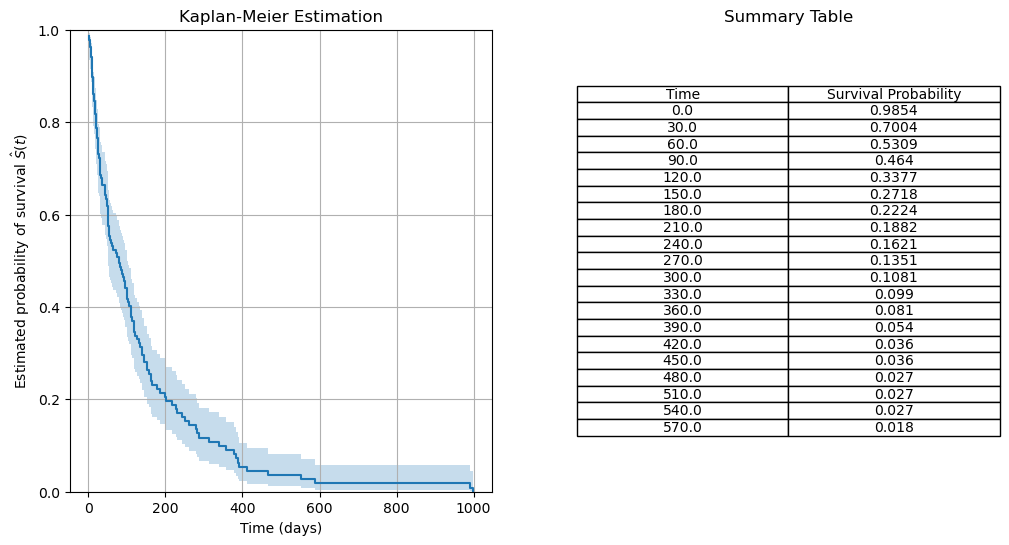

In [13]:
# Import necessary libraries
from sksurv.datasets import load_veterans_lung_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

# Load the dataset
data_x, data_y = load_veterans_lung_cancer()

# Display specific records from the dataset
pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

# Perform Kaplan-Meier estimation
time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y["Status"], data_y["Survival_in_days"], conf_type="log-log"
)

# Plot the Kaplan-Meier curve
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel(r"Estimated probability of survival $\hat{S}(t)$")
plt.xlabel("Time (days)")
plt.title("Kaplan-Meier Estimation: Veterans Lung Cancer Data")
plt.grid(True)
plt.show()

# Extracting survival probabilities at specific time points (0 to 990 days with 30-day intervals)
time_points = list(range(0, 991, 30))
summary_data = {"Time": time_points, "Survival Probability": []}

for t in time_points:
    mask = time >= t
    survival_at_t = survival_prob[mask][0] if any(mask) else 0
    summary_data["Survival Probability"].append(survival_at_t)

# Convert to DataFrame for display
summary_df = pd.DataFrame(summary_data)
summary_df["Survival Probability"] = summary_df["Survival Probability"].round(4)

# Display the summary table
print(summary_df.head(20))

# Plot the summary data next to the Kaplan-Meier curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Kaplan-Meier plot
ax1.step(time, survival_prob, where="post")
ax1.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
ax1.set_ylim(0, 1)
ax1.set_ylabel(r"Estimated probability of survival $\hat{S}(t)$")
ax1.set_xlabel("Time (days)")
ax1.set_title("Kaplan-Meier Estimation")
ax1.grid(True)

# Summary table plot
ax2.axis("off")
ax2.table(cellText=summary_df.head(20).values, colLabels=summary_df.columns, cellLoc='center', loc='center')
ax2.set_title("Summary Table")

plt.show()


## Main observations

At the first month (after 30 days), the survival rate or probability of survival is about $70 \%$.

There seems to be some kind of breakup point at 6 months (after 180 days) as the slope gets less steep.

After on year, the survival rate is lower than $10 \%$. A patient has a $10 \%$ or less probability of surving one year.

Information about censoring (a vertical line on the Kaplan-Maier survival function) is obtained in R using "autoplot()".


## Analysis by treatment

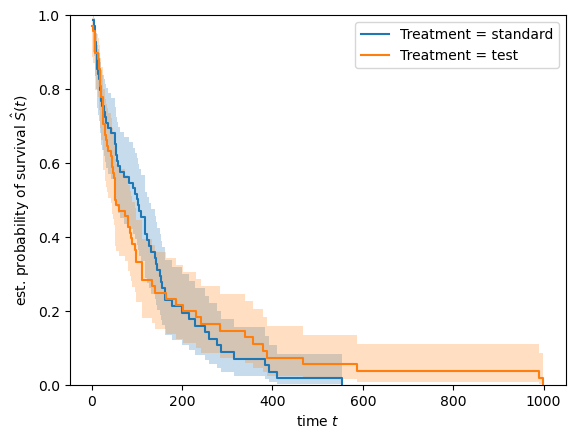

In [28]:
for treatment_type in ("standard", "test"):
    mask_treat = data_x["Treatment"] == treatment_type
    time_treatment, survival_prob_treatment, conf_int = kaplan_meier_estimator(
        data_y["Status"][mask_treat],
        data_y["Survival_in_days"][mask_treat],
        conf_type="log-log",
    )

    plt.step(time_treatment, survival_prob_treatment, where="post", label=f"Treatment = {treatment_type}")
    plt.fill_between(time_treatment, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

## Analysis by cell type

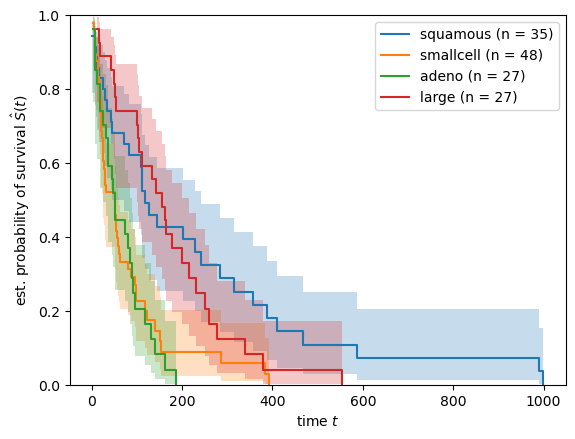

In [30]:
for value in data_x["Celltype"].unique():
    mask = data_x["Celltype"] == value
    time_cell, survival_prob_cell, conf_int = kaplan_meier_estimator(
        data_y["Status"][mask], data_y["Survival_in_days"][mask], conf_type="log-log"
    )
    plt.step(time_cell, survival_prob_cell, where="post", label=f"{value} (n = {mask.sum()})")
    plt.fill_between(time_cell, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

## Main observations

Treatment stratum 2 has the overall better survival rate with a better suvival curve (overall less steep)

Cell type "squamous" has the overall better survival rate compared to small cell, adeno and lage.

Stratification or dividing the initial sample into homogeneous subsamples help us refine the analyses.

Kaplan-Meier estimator is a non-parametric inferential method. Cox proportional hazard regression allows for multiple explanatory variables. We will explore this family of regression methods in as next topic.